## Datensatz
Datensatz für Vorhersagen das Überleben von Patienten mit Herzinsuffizienz anhand von medizinische Merkmale wie Serumkreatinin, Ejektionsfraktion, ....

### Import von Bibliotheken

In [15]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline


import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report

import warnings
warnings.filterwarnings('ignore')



### Import der Datensatz

In [16]:

data = pd.read_csv("diabetes.csv")
df = data.copy()

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Visualization

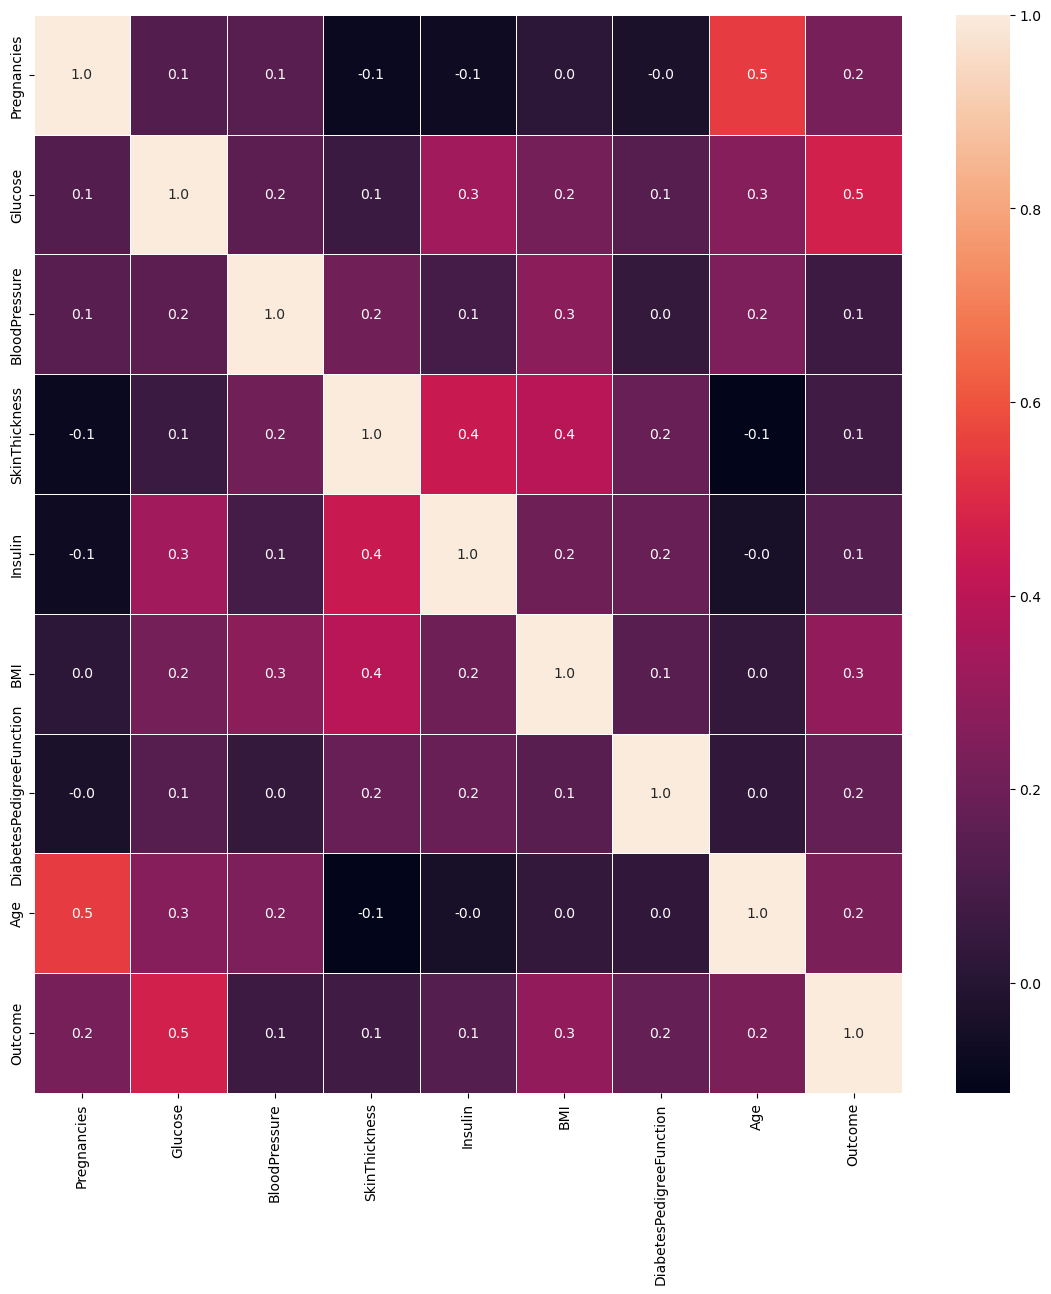

In [18]:
f, ax = plt.subplots(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt=".1f", ax=ax)
plt.show()

## Model Construction

In [19]:
inp_data = data.drop(data[['Outcome']], axis=1)
out_data = data[['Outcome']]

scaler = StandardScaler()
inp_data = scaler.fit_transform(inp_data)

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=42)

In [20]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (614, 8)
X_test Shape  :  (154, 8)
y_train Shape :  (614, 1)
y_test Shape  :  (154, 1)


Train/Test split results:
LogisticRegression accuracy is 0.753
LogisticRegression log_loss is 0.509
LogisticRegression auc is 0.815


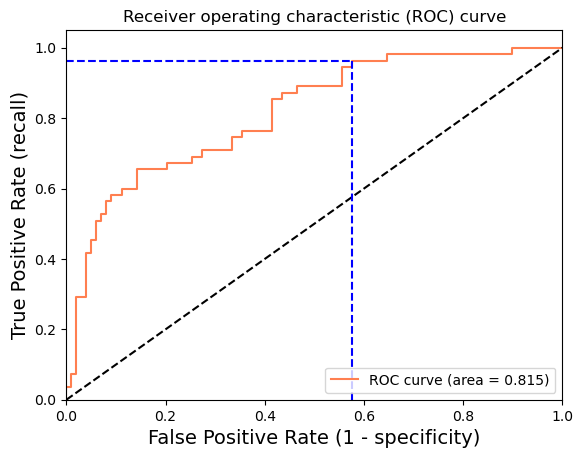

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


<AxesSubplot:>

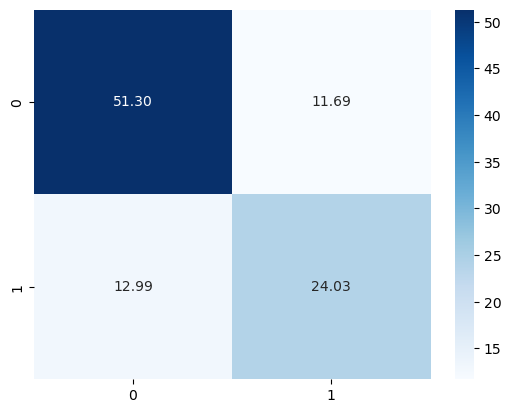

In [22]:
cf_matrix = confusion_matrix(y_pred.T, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

**Support Vector Machine Algorithm**
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>

In [23]:
from sklearn.svm import SVC
clf = SVC() 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7273
SVC f1-score  : 0.5962
SVC precision : 0.5636
SVC recall    : 0.6327

               precision    recall  f1-score   support

           0       0.82      0.77      0.79       105
           1       0.56      0.63      0.60        49

    accuracy                           0.73       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.74      0.73      0.73       154



In [24]:
# find best parameters with SVC | Step 1
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([0.01, 0.1, 1])
clf = SVC()
clf.fit(X_train, y_train) 
param_grid = dict(kernel=kernels, C=c)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_
warnings.filterwarnings('ignore')

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [25]:
clf = SVC(C=0.1, kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7597
SVC f1-score  : 0.6606
SVC precision : 0.6545
SVC recall    : 0.6667

               precision    recall  f1-score   support

           0       0.82      0.81      0.81       100
           1       0.65      0.67      0.66        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



Random Forest ist ein Gemeinschaftsmodell, bei dem mehrere Entscheidungsbäume kombiniert werden, um ein stärkeres Modell zu erhalten. Das daraus abgeleitete Modell ist robuster und genauer und kann mit Überanpassungen besser umgehen als konstitutive Modelle.

## Grundlegende Theorie
Random Forest besteht aus einer Reihe von Entscheidungsbäumen, die mit der "Bagging-Methode" kombiniert werden, um Klassifizierungs- und Regressionsergebnisse zu erhalten. Bei der Klassifizierung wird die Ausgabe anhand der Mehrheitsentscheidung berechnet, während bei der Regression der Durchschnitt berechnet wird.

Random Forest erstellt ein robustes und genaues Modell, das eine Vielzahl von Eingabedaten mit binären, kategorialen und kontinuierlichen Merkmalen verarbeiten kann.

![](https://miro.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png)


Accuracy Score: 0.7662
Random Forest Classifier f1-score      : 0.6727
Random Forest Classifier precision     : 0.6727
Random Forest Classifier recall        : 0.6727
Random Forest Classifier roc auc score : 0.7455

               precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



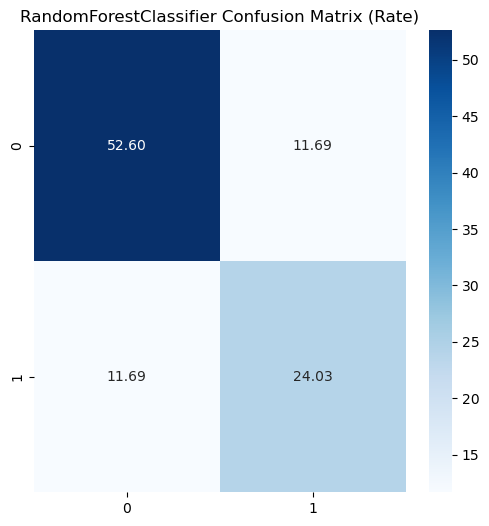

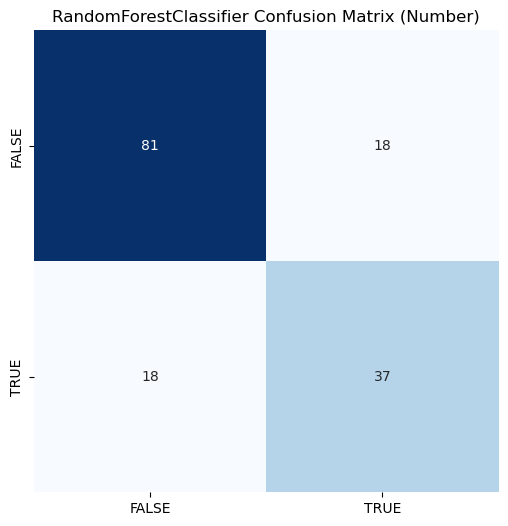

In [26]:
# Import the necessary packages
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
    
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Random Forest Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Random Forest Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Random Forest Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Random Forest Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))
    
plt.figure(figsize=(6,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
plt.title("RandomForestClassifier Confusion Matrix (Rate)")
plt.show()
    
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Blues",
                xticklabels=["FALSE","TRUE"],
                yticklabels=["FALSE","TRUE"],
                cbar=False)
plt.title("RandomForestClassifier Confusion Matrix (Number)")
plt.show()

In [27]:
param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5,1,'auto'],
    "max_depth": [1,2,3,4,None],
    "min_samples_split": [2,5,8]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarni

KeyboardInterrupt: 

Accuracy Score: 0.7662
Random Forest Classifier f1-score      : 0.6727
Random Forest Classifier precision     : 0.6727
Random Forest Classifier recall        : 0.6727
Random Forest Classifier roc auc score : 0.7455

               precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



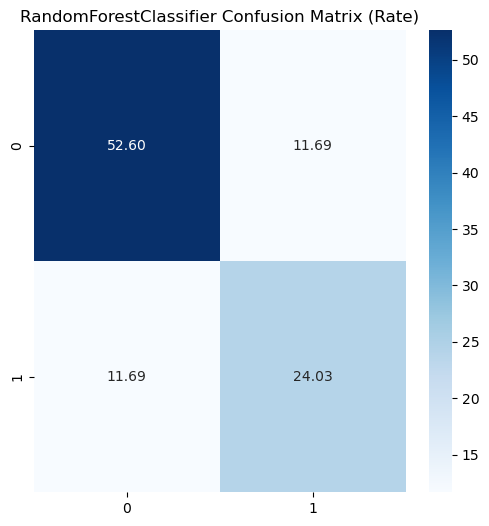

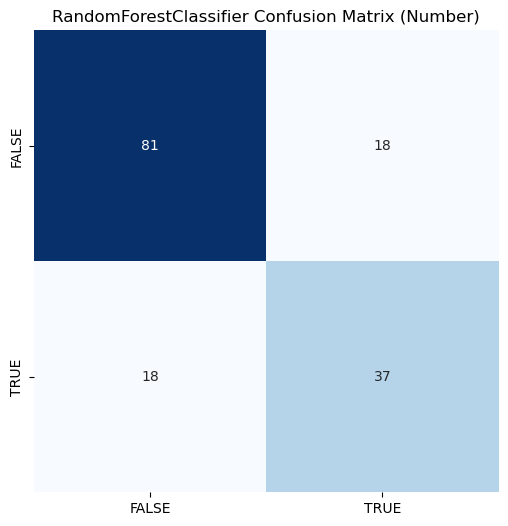

In [28]:
clf = RandomForestClassifier(
    n_estimators=1000,
    max_features=0.5,
    max_depth=3,
    min_samples_split=5,
    random_state=0
)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Random Forest Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Random Forest Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Random Forest Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Random Forest Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))
    
plt.figure(figsize=(6,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
plt.title("RandomForestClassifier Confusion Matrix (Rate)")
plt.show()
    
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Blues",
                xticklabels=["FALSE","TRUE"],
                yticklabels=["FALSE","TRUE"],
                cbar=False)
plt.title("RandomForestClassifier Confusion Matrix (Number)")
plt.show()

## Deep Learning


In [29]:

from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 16, epochs = 80, validation_split=0.25)



val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()


print(classification_report(y_test, y_pred))

# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})





2023-03-11 16:39:06.726116: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/80


2023-03-11 16:39:11.011789: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ValueError: in user code:

    File "/usr/local/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 12), found shape=(None, 8)
